<a href="https://colab.research.google.com/github/markjh2323/phase_5_project/blob/master/dsc_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!wget http://data.csail.mit.edu/places/places205/testSetPlaces205_resize.tar.gz
!tar -xzf testSetPlaces205_resize.tar.gz

--2022-05-18 16:23:51--  http://data.csail.mit.edu/places/places205/testSetPlaces205_resize.tar.gz
Resolving data.csail.mit.edu (data.csail.mit.edu)... 128.52.129.40
Connecting to data.csail.mit.edu (data.csail.mit.edu)|128.52.129.40|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2341250899 (2.2G) [application/octet-stream]
Saving to: ‘testSetPlaces205_resize.tar.gz’

testSetPlaces205_re 100%[===================>]   2.18G  2.02MB/s    in 17m 46s 

2022-05-18 16:41:36 (2.10 MB/s) - ‘testSetPlaces205_resize.tar.gz’ saved [2341250899/2341250899]



In [17]:
import io, os, sys, setuptools, tokenize

In [18]:
import os
os.makedirs('images/train/class/', exist_ok=True)
os.makedirs('images/val/class/', exist_ok=True)
for i, file in enumerate(os.listdir('testSet_resize')):
  if i < 1000:
    os.rename('testSet_resize/' + file, 'images/val/class/' + file)
  else:
    os.rename('testSet_resize/' + file, 'images/train/class/' + file)

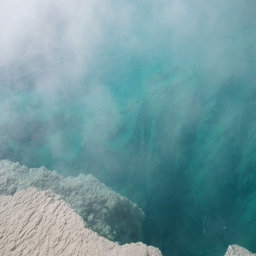

In [19]:
from IPython.display import Image, display
display(Image(filename='images/val/class/0022f1e6c375bb2bdb991efad47df060.jpg'))

In [21]:
import skimage
print(skimage.__version__)

0.18.3


In [1]:
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [ ]:
!pip install torch matplotlib numpy scikit-image pillow==4.1.1

  Using cached scikit_image-0.19.2-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (13.5 MB)
  Using cached scikit_image-0.19.1-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (13.3 MB)
  Using cached scikit_image-0.19.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (55.4 MB)
  Using cached scikit_image-0.18.2-cp37-cp37m-manylinux1_x86_64.whl (29.2 MB)
  Using cached scikit_image-0.18.1-cp37-cp37m-manylinux1_x86_64.whl (29.2 MB)
  Using cached scikit_image-0.18.0-cp37-cp37m-manylinux1_x86_64.whl (29.2 MB)
  Using cached scikit_image-0.17.2-cp37-cp37m-manylinux1_x86_64.whl (12.5 MB)
  Using cached scikit_image-0.17.1-cp37-cp37m-manylinux1_x86_64.whl (12.3 MB)
  Using cached scikit_image-0.16.2-cp37-cp37m-manylinux1_x86_64.whl (26.5 MB)
  Using cached scikit_image-0.16.1-cp37-cp37m-manylinux1_x86_64.whl (26.5 MB)
  Using cached scikit_image-0.15.0-cp37-cp37m-manylinux1_x86_64.whl (26.3 MB)
  Using cached scikit_image-0.14.5-cp37-cp37m-manylinux1_x86_64.whl

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.color import lab2rgb, rgb2lab, rgb2gray
from skimage import io

import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision.models as models
from torchvision import datasets, transforms

import os, shutil, time

/usr/local/lib/python3.7/dist-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [6]:
# Check if GPU is available
use_gpu = torch.cuda.is_available()
use_gpu

False